In [1]:
import pandas as pd
import numpy as np

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
import cv2
import warnings 
warnings.filterwarnings("ignore")

Using TensorFlow backend.


2.1.0


In [3]:
import os

In [4]:
img_width=150
img_height=150

In [5]:
train  =   (r'D:/New folder/Train')

In [6]:
test   =   (r'D:/New folder/Test')

In [7]:
train_sample=200
test_sample=100
epochs=20
batch_size=20

In [8]:
from keras import backend as K
if K.image_data_format() == 'channels_first':
  input_shape = (3, img_width, img_height)
else:
  input_shape = ( img_width, img_height,3)

In [9]:
train_datagen=ImageDataGenerator(
     rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary'
    
)

Found 200 images belonging to 2 classes.


In [11]:
test_datagen=ImageDataGenerator(
    rescale=1./255)

In [12]:
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 200 images belonging to 2 classes.


In [13]:
      model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=input_shape))
model.add( Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.summary()

model.add(Conv2D(64, kernel_size=(3, 3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, kernel_size=(3, 3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

   



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
__________________________________

In [14]:
from PIL import Image
from IPython.display import display
from PIL import Image

In [15]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint , EarlyStopping , ReduceLROnPlateau

checkpoint = ModelCheckpoint(r'jeans_traouser_cnn.h5',
                    monitor='val_loss',
                    mode= 'min',
                    save_best_only=True,
                    verbose=1,)

                
early_stopping = EarlyStopping(monitor = 'val_loss',
                               min_delta = 0,
                               patience =3, 
                               verbose= 1,
                               restore_best_weights=True
                              )
                            
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                            factor = 0.2,
                            patience= 3,
                            verbose= 1,
                            min_delta= 0.0001)

callbacks = [checkpoint, early_stopping , reduce_lr]
                              
                              
                              
            
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])     
                              

In [17]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=train_sample,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=test_generator,
    validation_steps=test_sample
)

Epoch 1/20
200/200 [==============================] - 140s 698ms/step - loss: 0.9556 - accuracy: 0.4875 - val_loss: 0.6916 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.69159, saving model to jeans_traouser_cnn.h5
Epoch 2/20
200/200 [==============================] - 136s 681ms/step - loss: 0.6934 - accuracy: 0.4785 - val_loss: 0.6931 - val_accuracy: 0.5000

Epoch 00002: val_loss did not improve from 0.69159
Epoch 3/20
200/200 [==============================] - 138s 689ms/step - loss: 0.6934 - accuracy: 0.4850 - val_loss: 0.6939 - val_accuracy: 0.5000

Epoch 00003: val_loss did not improve from 0.69159
Epoch 4/20
200/200 [==============================] - 135s 673ms/step - loss: 0.6934 - accuracy: 0.4870 - val_loss: 0.6934 - val_accuracy: 0.5000

Epoch 00004: val_loss did not improve from 0.69159
Restoring model weights from the end of the best epoch

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
Epoch 00004: early stopping


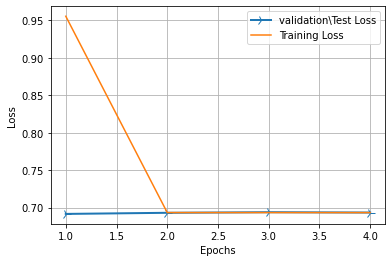

In [18]:
import matplotlib.pyplot as plt

history_dict=history.history

loss_values=history_dict["loss"]
val_loss_value=history_dict["val_loss"]
epochs=range(1, len(loss_values) +1)


line1=plt.plot(epochs , val_loss_value , label='validation\Test Loss')
line2=plt.plot(epochs , loss_values, label='Training Loss')
plt.setp(line1 ,linewidth=2.0 ,marker='+',markersize=10.0)
plt.setp(line1 ,linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid("True")
plt.legend()
plt.show()

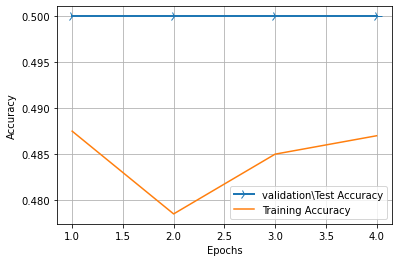

In [19]:
import matplotlib.pyplot as plt

history_dict=history.history

acc_values=history_dict["accuracy"]
val_acc_value=history_dict["val_accuracy"]
epochs=range(1, len(acc_values) +1)


line1=plt.plot(epochs , val_acc_value , label='validation\Test Accuracy')
line2=plt.plot(epochs , acc_values, label='Training Accuracy')
plt.setp(line1 ,linewidth=2.0 ,marker='+',markersize=10.0)
plt.setp(line1 ,linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid("True")
plt.legend()
plt.show()

In [21]:
model.save("jeans_traouser_cnn.h5")

In [22]:
from keras.models import  load_model

classifier= load_model(r"C:\Users\tarun\jeans_traouser_cnn.h5")

In [23]:
from PIL import Image
from IPython.display import display
from PIL import Image
import cv2
import numpy as np
from keras.preprocessing import image
import os
import cv2
from os import listdir
from os.path import isfile, join
import re

def draw_test(name, res , input_im):
    BLACK = [0,0,0]
    res=int(res)
    if res==0:
        pred="jeans"
    if res==1:
        pred="Trousers"
    expanded_image= cv2.copyMakeBorder(input_im , 160 , 0 , 0,500 , cv2.BORDER_CONSTANT , value=BLACK)
    cv2.putText(expanded_image , "predicted- " + pred(20,60) , cv2,FONT_HERSHEY_SIMPLEX , 1 , (0,255,0) , 2)
    #xpanded_image= cv2.cvtcolor(expanded_image , cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image , "true- " + true_label, (20,120) , cv2.FONT_HERSHEY_SIMPLEX , 1  , (0,255,0) ,2)
    cv2.imshow(name , expanded_image)
    
    
    

def getRandomimage(path,img_widht,img_height):
    
    folders = list(filter(lambda x:os.path.isdir(os.path.join(path,x)),os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class= folders[random_directory]
    file_path = path + "/" + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path , f))]
    random_file_index = np.random.randint(0, len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path , target_size = (img_width , img_height)), final_path ,path_class


img_width ,img_height = 150,150



files = []
predictions=[]
true_labels= []
class_labels=[]

for i in range(0,10):
    path= (r'D:/New folder/Test')
    img , final_path ,true_label = getRandomimage(path , img_width , img_height)
    files.append(final_path)
    true_labels.append(true_label)
    
    X= image.img_to_array(img)
    X= np.expand_dims(X,axis=0)
    images=np.vstack([X])
    classes = model.predict_classes(images , batch_size=20)
    predictions.append(classes)
    
for i in range(0 , len(files)):
    image = cv2.imread((files[i]))
    #raw_test =("prediction" ,class_labels[predictions[i][0]], image ,true_labels [i])
    cv2.waitKey(0)

cv2.destroyAllWindows()